## Overview

Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for.

# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. </br>
Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. </br>
Please report/illustrate important features of the demand, such as daily cycles. </br>
If there are data quality issues, please report them.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
login_data = pd.read_json('logins.json')

## Explore the Data

In [3]:
login_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
login_data.shape

(93142, 1)

In [5]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
login_data.isnull().sum()

login_time    0
dtype: int64

In [7]:
login_data.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [8]:
login_data['login_time'].max() - login_data['login_time'].min()

Timedelta('101 days 22:45:22')

### Data details

The data contains one column - login_time of type datetime64. There are no missing values.
It has 93142 observations
It shows the login times for 4 months (101 days) from January 1 , 1970 to April 13. 1970

### Aggregate login counts based on 15minute time intervals

In [9]:
login_data['count'] = 1

In [10]:
login_data.set_index('login_time', inplace=True)

In [11]:
login_data = login_data.resample('15min', origin='start').sum()

Resampling the data for 15 minute interval and starting the sampling from time 20:12:16 and not 20:00:00

In [12]:
login_data.head()

,count
login_time,
1970-01-01 20:12:16,8
1970-01-01 20:27:16,8
1970-01-01 20:42:16,6
1970-01-01 20:57:16,3
1970-01-01 21:12:16,3


In [13]:
login_agg = login_data.copy()

In [14]:
login_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:12:16 to 1970-04-13 18:57:16
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [15]:
login_agg.head()

,count
login_time,
1970-01-01 20:12:16,8
1970-01-01 20:27:16,8
1970-01-01 20:42:16,6
1970-01-01 20:57:16,3
1970-01-01 21:12:16,3


### Visualize and describe the resulting time series of login counts

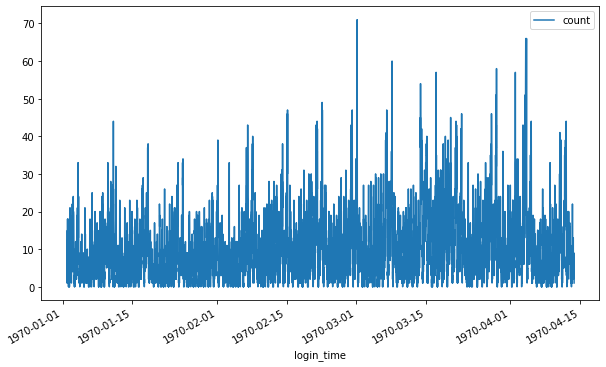

In [16]:
login_agg.plot(figsize=(10,6));

### Data trends during the 4 months

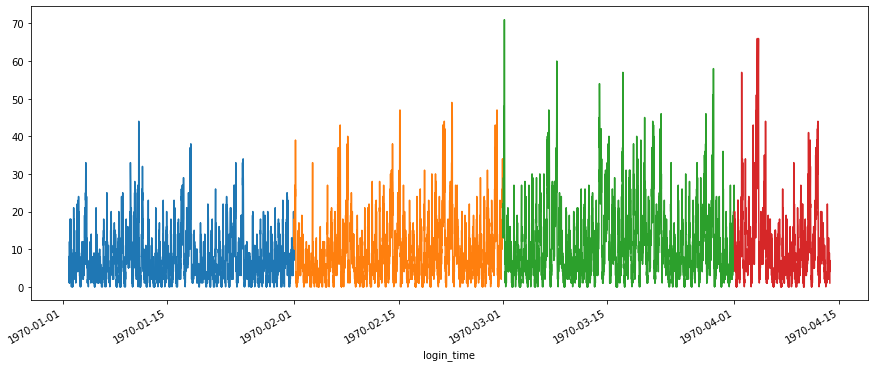

In [17]:
ax = login_agg.loc['1970-01'].plot(figsize=(15,6), legend=False);
login_agg.loc['1970-02'].plot(figsize=(15,6), ax=ax, legend=False);
login_agg.loc['1970-03'].plot(figsize=(15,6), ax=ax, legend=False);
login_agg.loc['1970-04'].plot(figsize=(15,6), ax=ax, legend=False);

In [18]:
login_agg_month = login_agg.resample('M').sum()

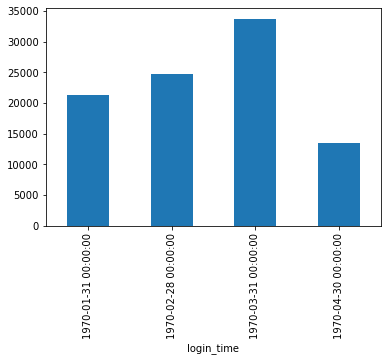

In [19]:
login_agg_month.plot(kind='bar', legend=False);

Result: Plotting the monthly logins shows that March had the most logins and January had the least logins. Since each month shows different values we cannot conclude any behaviors using monthly data

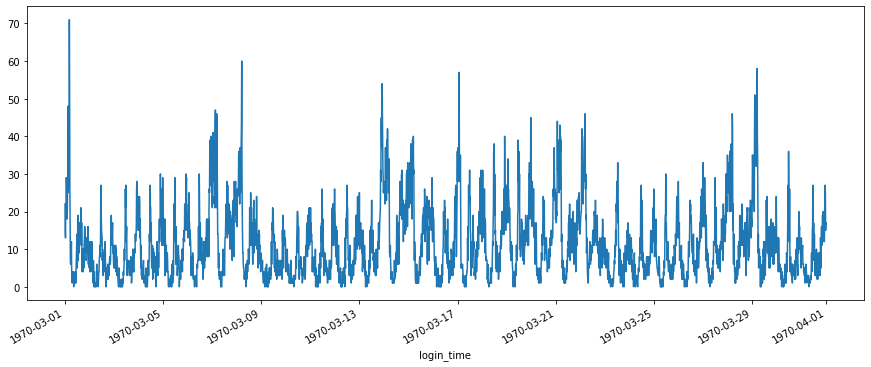

In [20]:
login_agg.loc['1970-03'].plot(figsize=(15,6), legend=False);

Looking at the data for March month, we can see some patterns that in some days there are more logins than other days.

### Is there difference in weekday and weekend login times?

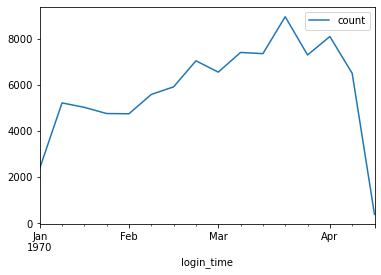

In [21]:
weekly = login_agg.resample('W').sum()
weekly.plot();

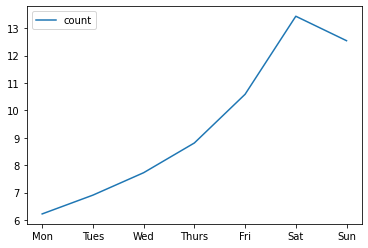

In [22]:
by_weekday = login_agg.groupby(login_agg.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot();

Here we see that Saturday, followed by Sunday has the highest number of logins. Monday has the lowest number of logins and logins increase steadily through the week.

### What time has the most number of logins?

In [23]:
weekend = np.where(login_agg.index.weekday < 5, 'Weekday', 'Weekend')
by_time = login_agg.groupby([weekend, login_agg.index.time]).mean()

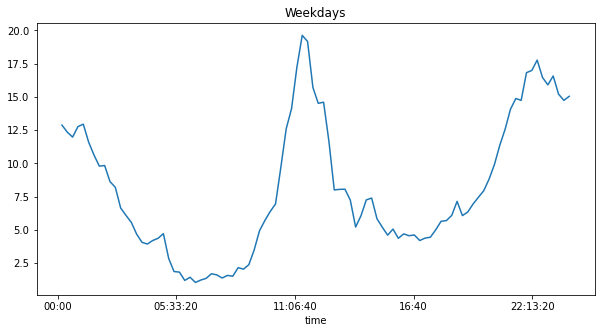

In [24]:
by_time.loc['Weekday'].plot(title='Weekdays', figsize=(10,5), legend=False);

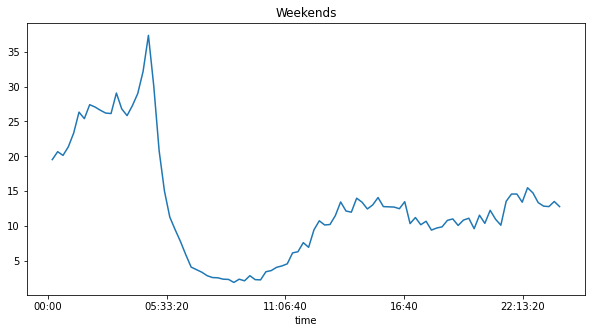

In [25]:
by_time.loc['Weekend'].plot(title='Weekends', figsize=(10,5), legend=False);

Weekdays and Weekends logins graph is very different. During the week the logins are highest between 11 am and 12 noon. There is also increase during 9pm to 10pm on weekdays.

During Weekends the logins are highest early morning around 4-5am.

# Part 2 Experiment and metrics design

1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric? </br>

**The key measure of success would be to keep track of the number of cars, driver details, reimbursement cost of going back and forth on the bridge between the two cities, so that toll costs can be accurately and timely reimbursed.**

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:</br>

a) how you will implement the experiment

**A practical experiment, that I would propose would be to count the number of drivers crossing the bridge between Gotham and Metropolis from 12:00 am (midnight) to 11:59pm every day for 1 week and reimburse the cost to the drivers and also to carry on this experiment for atleast 3 months to collect enough data to see the movements of drivers between the two cities.**

b) what statistical test(s) you will conduct to verify the significance of the
observation

**Conduct A/B testing.**

**Null Hypothesis for Gotham city: The average drivers going on the toll bridge from Gotham to Metroplis city will increase atleast by 10% by reimbursing all toll costs.**

**Null Hypothesis for Metropolis city: The average drivers going on the toll bridge from Metroplis to Gotham city will increase atleast by 10% by reimbursing all toll costs.**

**Collect Evaluation metrics and conduct the test**

**For Gotham city**
**- Determine the sample size and duration of the test**</br>
**- Take the average of drivers using the bridge with toll fee**
**- Take the average of drivers using the bridge with toll fee reimbursed**
**- Randomize the experiment**
**- Set the alpha value, typically alpha is set to 5% or 0.05**
**- Determine the p-value i.e by first calculating the t-test**

**Do the same for Metropolis city**

c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

**Compare the p-value to the alpha. If the p-value is greater than the alpha, do not reject the null hypothesis**

# Part 3  Predictive Modeling

## Load Data

In [26]:
data = pd.read_json('ultimate_data_challenge.json')

In [27]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [28]:
data.shape

(50000, 12)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Data Wrangling

#### 1. check for missing values

In [30]:
data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

avg_rating_of_driver, phone and avg_rating_by_driver attributes have missing values

In [31]:
data['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [32]:
data['avg_rating_of_driver'].value_counts()

5.0    20771
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.7        2
1.8        2
1.9        1
1.6        1
2.2        1
Name: avg_rating_of_driver, dtype: int64

In [33]:
data['avg_rating_by_driver'].value_counts()

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
3.2        2
2.7        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

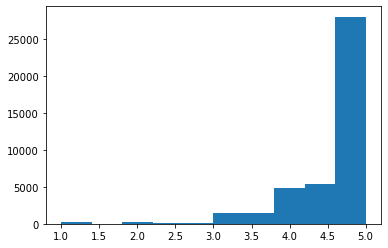

In [34]:
plt.hist(data['avg_rating_of_driver']);

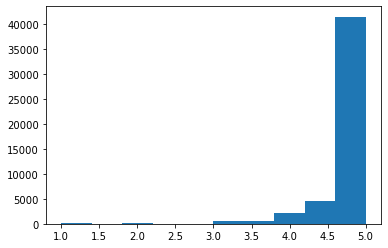

In [35]:
plt.hist(data['avg_rating_by_driver']);

Since the values are skewed for both attributes - avg_rating_of_driver and avg_rating_by_driver, the null values are filled by the median of these values.</br>
The phone attribute has only two types - iphone and android. So filled the missing data with value, 'Other'

In [36]:
# fill the null values
data['phone'] = data['phone'].fillna('Other')
data['avg_rating_of_driver'] = data['avg_rating_of_driver'].replace(to_replace = np.nan,
                                                                value = data['avg_rating_of_driver'].median())
data['avg_rating_by_driver'] = data['avg_rating_by_driver'].replace(to_replace = np.nan,
                                                                value = data['avg_rating_by_driver'].median())

#### 2. convert datetime columns - signup_date and last_trip_date

In [37]:
data['signup_date'] = pd.to_datetime(data['signup_date'], format = '%Y-%m-%d')
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'], format = '%Y-%m-%d')

## Exploratory Data Analysis

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [39]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.650038,1.074764,8.849536,60.926084,5.796827,4.779050
std,3.792684,0.575601,0.222336,19.958811,37.081503,5.707357,0.445974
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


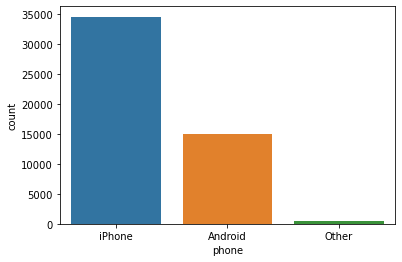

In [40]:
sns.countplot(x='phone', data=data);

Majority of the drivers use iphones 

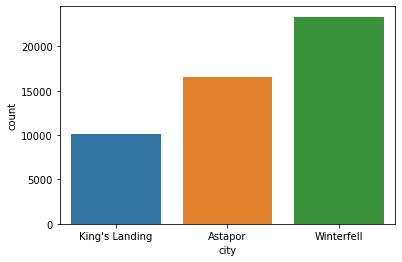

In [41]:
sns.countplot(x='city', data=data);

About 46% of the drivers are registered with Winterfell city

In [42]:
data['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

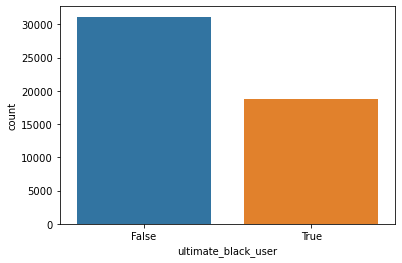

In [43]:
sns.countplot(x= 'ultimate_black_user', data=data);

About 62% of the drivers have not signed up for Ultimate Black account in their first 30 days

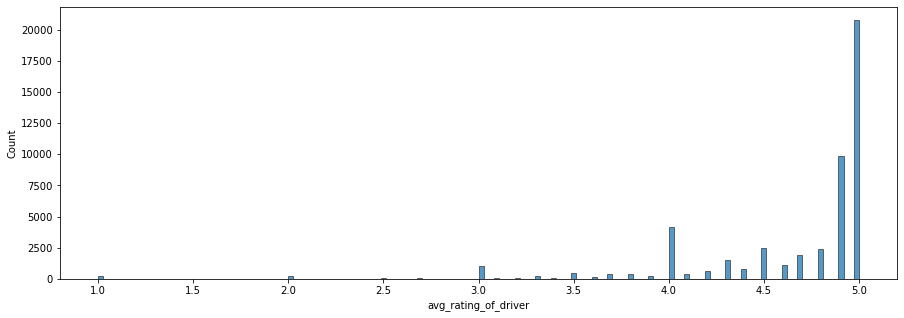

In [44]:
plt.figure(figsize=(15,5))
sns.histplot(x='avg_rating_of_driver',data=data);

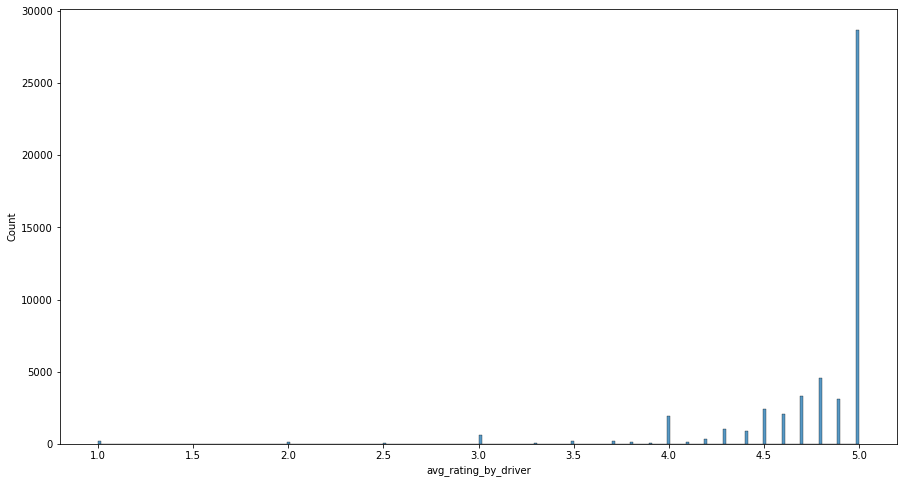

In [45]:
plt.figure(figsize=(15,8))
sns.histplot(x='avg_rating_by_driver', data=data);

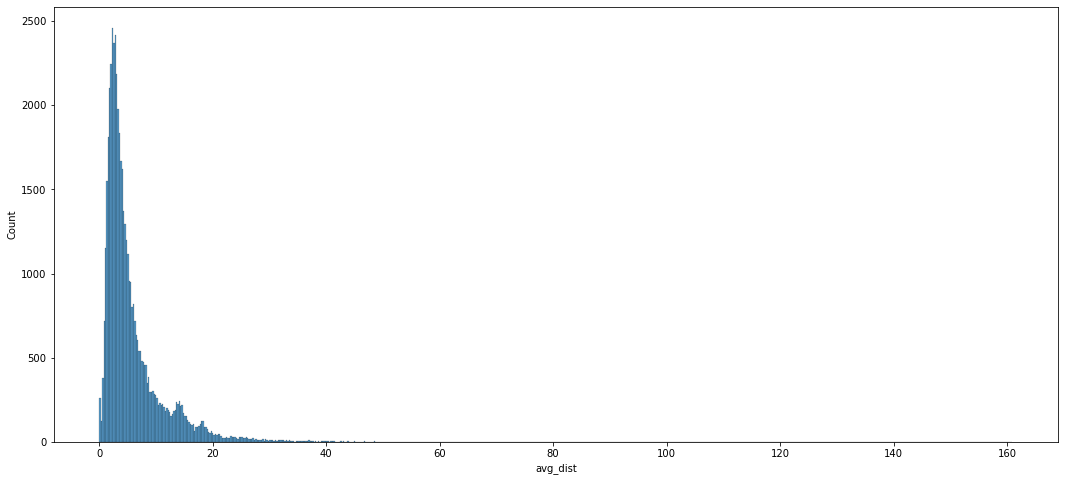

In [46]:
plt.figure(figsize=(18,8))
sns.histplot(x='avg_dist', data=data);

The average distance in miles per trip taken in the first 30 days after signup is less than 10 miles for majority of the drivers.

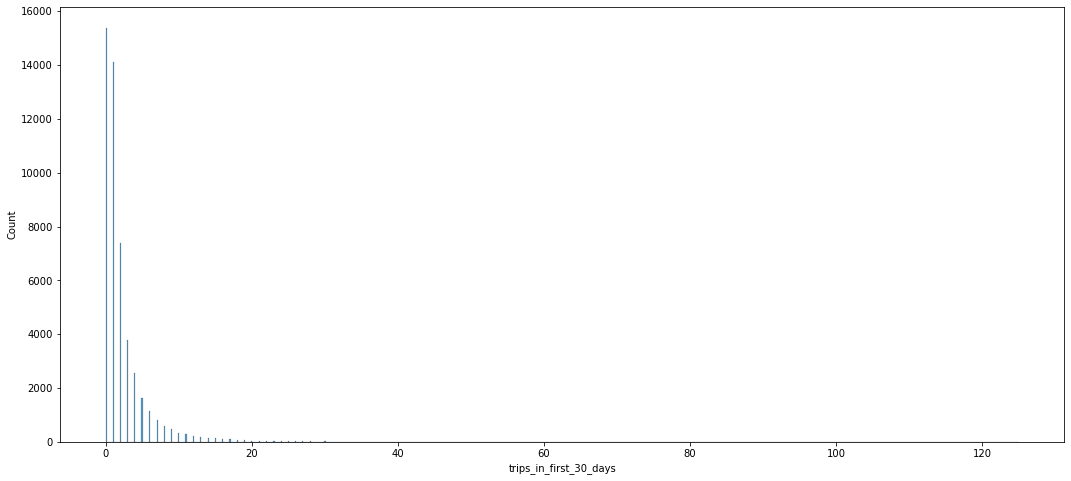

In [47]:
plt.figure(figsize=(18,8))
sns.histplot(x='trips_in_first_30_days', data=data);

The majority number of trips taken in the first 30 days after signing up is less than 10

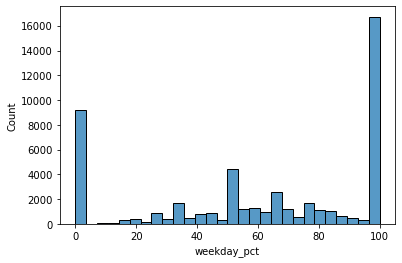

In [48]:
sns.histplot(x='weekday_pct', data=data); 

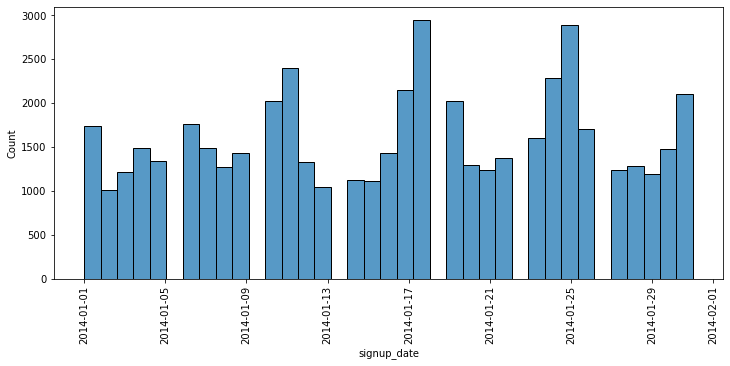

In [49]:
plt.figure(figsize=(12,5))
sns.histplot(x='signup_date', data=data)
plt.xticks(rotation='vertical'); 

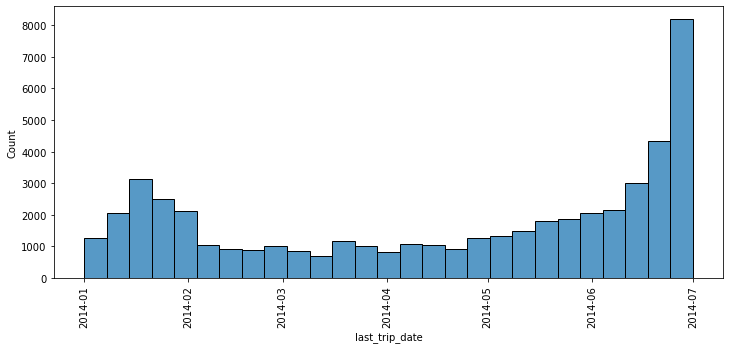

In [50]:
plt.figure(figsize=(12,5))
sns.histplot(x='last_trip_date', data=data)
plt.xticks(rotation='vertical'); 

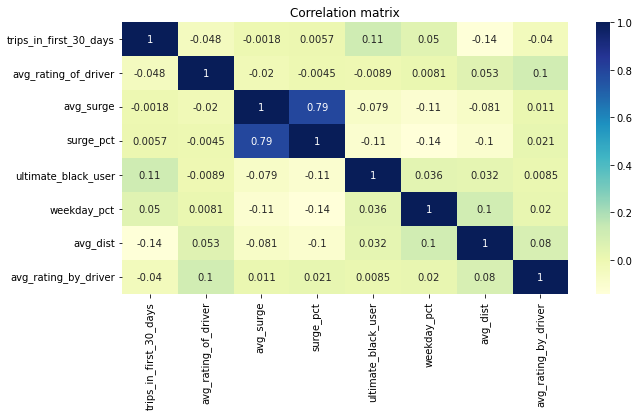

In [51]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation matrix");

In [52]:
# Import package for predictive power score matrix
import ppscore as pps

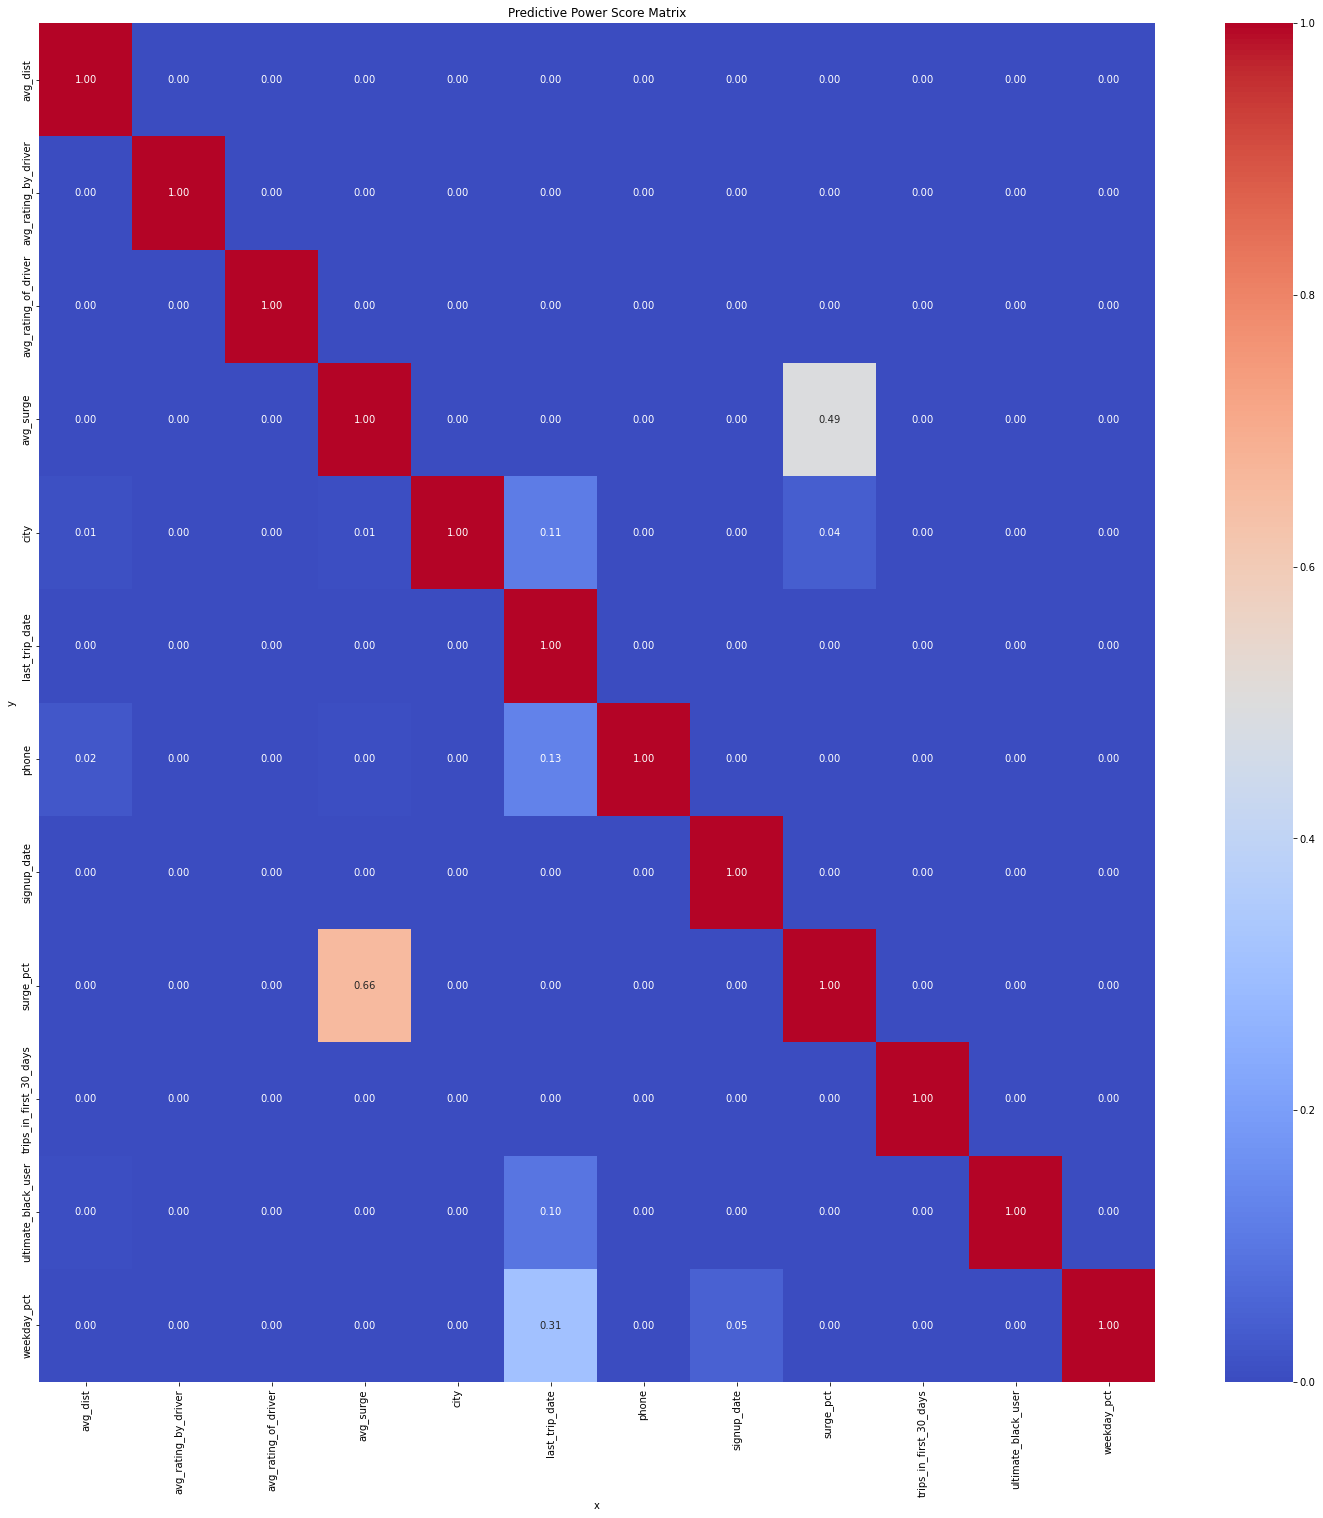

In [53]:
# Plot
plt.figure(figsize=(25, 25))
matrix_df = pps.matrix(data).pivot(columns='x', index='y',  values='ppscore')
sns.heatmap(matrix_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Predictive Power Score Matrix");

Both the Correlation Matrix and Predictive power score matrix indicates that 'avg_surge' and 'surge_pct' are moderately positively correlated. </br>
There is a weak positive correlation between 'last_trip_date' and 'weekday_pct'.

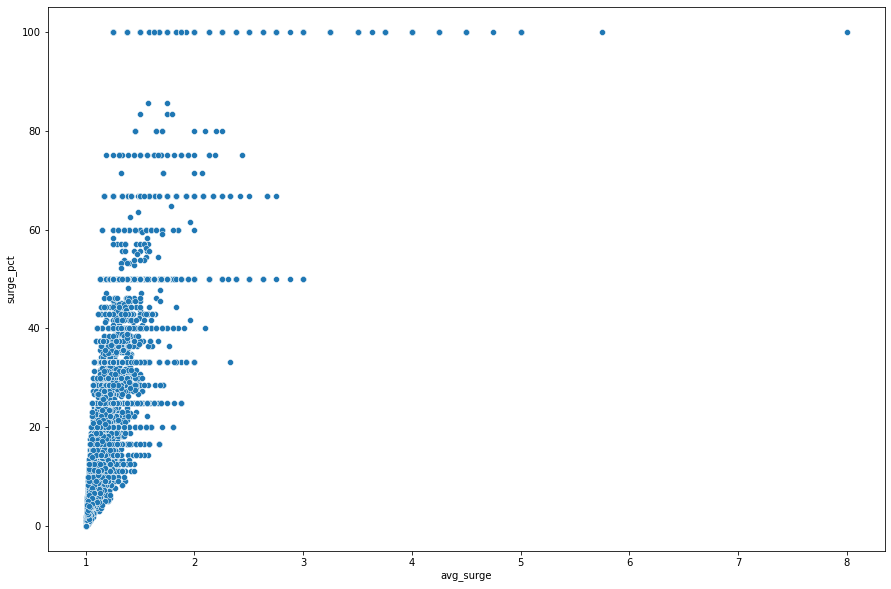

In [54]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, x="avg_surge", y="surge_pct");

In [55]:
# convert 'ultimate_black_user' column to 1 and 0
data['ultimate_black_user'] = data['ultimate_black_user'].astype(int)

### Calculate if the user is active

A user is considered retained if they were “active” (i.e. took a trip) in the preceding 30 days.

In [56]:
active_date = data['last_trip_date'].max() - pd.Timedelta(days=30)
active_date

Timestamp('2014-06-01 00:00:00')

In [57]:
# Create a new column called active user to indicate if that user is active or not
def create_active_user(data):
    if data['last_trip_date'] >= active_date:
        return 1
    else:
        return 0
    

data['active_user'] = data.apply(create_active_user , axis = 1)  

In [58]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0


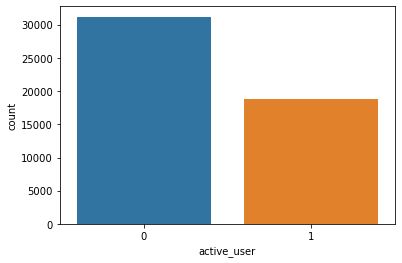

In [59]:
sns.countplot(x= 'active_user', data=data);

In [60]:
active_user_count = data['active_user'].value_counts()
active_user_count

0    31196
1    18804
Name: active_user, dtype: int64

### What fraction of the observed users were retained?

In [61]:
retained_active = active_user_count[1]/(active_user_count[0] + active_user_count[1])
retained_not_active = active_user_count[0]/(active_user_count[0] + active_user_count[1])

print(f'The percentage of observed users that were retained is {retained_active:.0%}')
print(f'The percentage of observed users that were not retained is {retained_not_active:.0%}')

The percentage of observed users that were retained is 38%
The percentage of observed users that were not retained is 62%


## Modeling

In [62]:
#Convert all categorical columns
data = pd.get_dummies(data, drop_first=True)
data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,city_King's Landing,city_Winterfell,phone_Other,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,1,0,0


In [63]:
# Divide into X and y
X = data.drop(columns = {'active_user', 'signup_date', 'last_trip_date', 'surge_pct'}, axis = 1).values
y = data['active_user'].values

In [64]:
print(f'X: {X.shape} \ny: {y.shape}')

X: (50000, 11) 
y: (50000,)


## 1. Logistic Regression

In [65]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [66]:
# Apply the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify= y)

In [67]:
print(f'Training Class: {X_train.shape} \nTesting Class: { X_test.shape}')

Training Class: (37500, 11) 
Testing Class: (12500, 11)


In [68]:
# PipeLines creation
# 1. Data preprocessing by using standard scaler
# 2. Apply Classifier

pipeline_lr = Pipeline([('standardscaler', StandardScaler()),
                        ('lr_classifer', LogisticRegression(random_state=42))])

In [69]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lr_classifer', LogisticRegression(random_state=42))])

In [70]:
pipeline_lr.score(X_test, y_test)

0.71472

### Grid search and hyperparameter tuning

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Hyperparameter tuning
param_grid = [{"lr_classifer__C": [0.001, 0.2, 0.4, 1.0]}]

In [72]:
grid_lr = GridSearchCV(pipeline_lr, param_grid, cv=5, verbose=1, refit = True, n_jobs = -1, scoring='accuracy')
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lr_classifer',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'lr_classifer__C': [0.001, 0.2, 0.4, 1.0]}],
             scoring='accuracy', verbose=1)

In [73]:
print(f"Best params:")
print(grid_lr.best_params_)
print("Best score in grid search:")
print(grid_lr.best_score_)

Best params:
{'lr_classifer__C': 0.001}
Best score in grid search:
0.7196


In [74]:
y_pred = grid_lr.predict(X_test)
print(f'Test set accuracy score for best params: {accuracy_score(y_test, y_pred):.3f}')

Test set accuracy score for best params: 0.717


In [75]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6785 1014]
 [2522 2179]]
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      7799
           1       0.68      0.46      0.55      4701

    accuracy                           0.72     12500
   macro avg       0.71      0.67      0.67     12500
weighted avg       0.71      0.72      0.70     12500



In [76]:
#get classifier
classifier_lr = grid_lr.best_estimator_.named_steps['lr_classifer']
classifier_lr

LogisticRegression(C=0.001, random_state=42)

In [77]:
#Feature Importance
X_cols= data.drop(columns = {'active_user', 'signup_date', 'last_trip_date', 'surge_pct'}, axis = 1).columns 
original_variables = list(X_cols)

# Extract the coefficients of the logistic regression estimator
model_coefficients = classifier_lr.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Features" : original_variables, "Coefficient": model_coefficients})
classifier_lr

LogisticRegression(C=0.001, random_state=42)

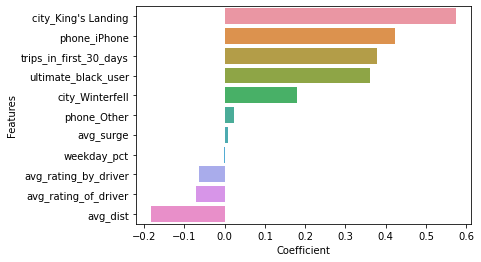

In [78]:
coefficient_df.sort_values(by=['Coefficient'], ascending=False,inplace=True)
sns.barplot(x='Coefficient', y='Features', data = coefficient_df);

## 2. Random forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
pipeline_rf = Pipeline([('rf_classifer', RandomForestClassifier(random_state=42))])

In [81]:
pipeline_rf.fit(X_train, y_train)
pipeline_rf.score(X_test, y_test)

0.75528

### Grid Search and hyperparameter tuning

In [82]:
param_grid = {"rf_classifer__n_estimators": [100, 200, 300, 400],
              "rf_classifer__max_depth": [1, 3, 5, 7],
              "rf_classifer__criterion":['gini', 'entropy']
             }

In [83]:
grid_rf = GridSearchCV(estimator= pipeline_rf, 
                       param_grid = param_grid, 
                       cv=5, 
                       verbose=1, 
                       refit = True, 
                       n_jobs = -1, 
                       scoring='accuracy')
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf_classifer',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf_classifer__criterion': ['gini', 'entropy'],
                         'rf_classifer__max_depth': [1, 3, 5, 7],
                         'rf_classifer__n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=1)

In [84]:
print(f'Best params: {grid_rf.best_params_}')
print(f'Best score in grid search: {grid_rf.best_score_:.3f}')

Best params: {'rf_classifer__criterion': 'gini', 'rf_classifer__max_depth': 7, 'rf_classifer__n_estimators': 200}
Best score in grid search: 0.778


In [85]:
y_pred = grid_rf.predict(X_test)
print(f'Test set accuracy score for best params: {accuracy_score(y_test, y_pred):.3f}')

Test set accuracy score for best params: 0.782


In [86]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6749 1050]
 [1669 3032]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      7799
           1       0.74      0.64      0.69      4701

    accuracy                           0.78     12500
   macro avg       0.77      0.76      0.76     12500
weighted avg       0.78      0.78      0.78     12500



In [87]:
#get classifier
classifier_rf = grid_rf.best_estimator_.named_steps['rf_classifer']
classifier_rf

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [88]:
# Extract the feature importance of Random forest
model_coefficients = classifier_rf.feature_importances_

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Features" : original_variables, "Coefficient": model_coefficients})
coefficient_df

,Features,Coefficient
0,trips_in_first_30_days,0.062071
1,avg_rating_of_driver,0.022163
2,avg_surge,0.161967
3,ultimate_black_user,0.069602
4,weekday_pct,0.140607
5,avg_dist,0.019140
6,avg_rating_by_driver,0.248591
7,city_King's Landing,0.175163
8,city_Winterfell,0.009589
9,phone_Other,0.000861


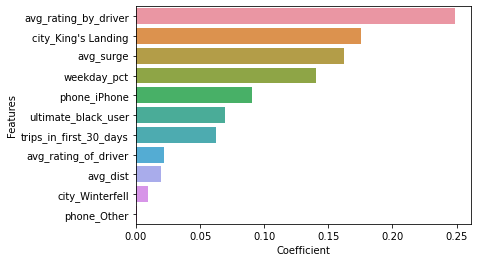

In [89]:
coefficient_df.sort_values(by=['Coefficient'], ascending=False,inplace=True)
sns.barplot(x='Coefficient', y='Features', data = coefficient_df);

### Insights gained from the model

Random forest model gave better accuracy results than logistic regression. 
The most important feature for Random forest model is 'avg_rating_by_driver'. 
* Better rating by driver can mean better retention of drivers
* King's landing city has more active drivers
* Features avg_surge and weekday_pct is also important for driver retention